In [1]:
# First we do a set of imports
import csv
from pprint import pprint
import cinnabar
from cinnabar import plotting as cinnabar_plotting
from cinnabar import femap, stats

In [2]:
# read in the experimental data

experimental_data = {}
experimental_filename = 'experimental_core4_exclude18to23.tsv'

with open(experimental_filename, 'r') as fd:
    rd = csv.reader(fd, delimiter="\t", quotechar='"')
    headers = next(rd)
    for row in rd:
        experimental_data[row[0]] = {}
        experimental_data[row[0]]['dG'] = float(row[1])
        experimental_data[row[0]]['ddG'] = float(row[2])

pprint(experimental_data)

{'13': {'dG': -10.5, 'ddG': 0.0},
 '27': {'dG': -10.02, 'ddG': 0.0},
 '28': {'dG': -9.13, 'ddG': 0.0},
 '29': {'dG': -9.56, 'ddG': 0.0},
 '30': {'dG': -10.67, 'ddG': 0.0},
 '31': {'dG': -9.55, 'ddG': 0.0},
 '32': {'dG': -9.77, 'ddG': 0.0},
 '33': {'dG': -10.75, 'ddG': 0.0},
 '34': {'dG': -11.21, 'ddG': 0.0},
 '35': {'dG': -10.42, 'ddG': 0.0},
 '36': {'dG': -10.75, 'ddG': 0.0}}


In [3]:
# Read in calculated results

calculated_data = {}
calculated_filename = './final_results_core4_exclude18to23_cycle_FEP.tsv'

with open(calculated_filename, 'r') as fd:
    rd = csv.reader(fd, delimiter="\t", quotechar='"')
    headers = next(rd)
    for row in rd:
        tag = row[0] + "->" + row[1]
        calculated_data[tag] = {}
        calculated_data[tag]['ligand_i'] = row[0]
        calculated_data[tag]['ligand_j'] = row[1]
        calculated_data[tag]['dG'] = float(row[2])
        calculated_data[tag]['ddG'] = float(row[3])

pprint(calculated_data)

{'13->32': {'dG': 0.7833333333333332,
            'ddG': 0.17211107524567446,
            'ligand_i': '13',
            'ligand_j': '32'},
 '27->13': {'dG': -0.12666666666666668,
            'ddG': 0.4043375927228247,
            'ligand_i': '27',
            'ligand_j': '13'},
 '28->13': {'dG': -0.25333333333333335,
            'ddG': 0.07133644853010898,
            'ligand_i': '28',
            'ligand_j': '13'},
 '28->31': {'dG': 0.7266666666666667,
            'ddG': 0.40202266381663393,
            'ligand_i': '28',
            'ligand_j': '31'},
 '28->36': {'dG': 0.13999999999999999,
            'ddG': 0.1930457631409368,
            'ligand_i': '28',
            'ligand_j': '36'},
 '29->27': {'dG': -0.8366666666666666,
            'ddG': 0.09030811456096043,
            'ligand_i': '29',
            'ligand_j': '27'},
 '30->32': {'dG': 0.6533333333333334,
            'ddG': 0.08379870059984355,
            'ligand_i': '30',
            'ligand_j': '32'},
 '30->34': {'dG': -1.39

In [4]:
cinnabar_filename = './final_results_core4_exclude18to23_cycle_FEP_cin.csv'

with open(cinnabar_filename, 'w') as f:
    f.write("# Experimental block\n")
    f.write("# Ligand, expt_DDG, expt_dDDG\n")
    for entry in experimental_data:
        dG = experimental_data[entry]['dG']
        ddG = experimental_data[entry]['ddG']
        f.write(f"{entry},{dG:.2f},{ddG:.2f}\n")
    f.write('\n')
    f.write('# Calculated block\n')
    f.write('# Ligand1,Ligand2,calc_DDG,calc_dDDG(MBAR),calc_dDDG(additional)\n')
    for entry in calculated_data:
        dG = calculated_data[entry]['dG']
        ddG = calculated_data[entry]['ddG']
        molA = calculated_data[entry]['ligand_i']
        molB = calculated_data[entry]['ligand_j']
        f.write(f"{molA},{molB},{dG:.2f},0,{ddG:.2f}\n")

/home/hiroyuki/miniforge3/envs/openfe_env/lib/python3.12/site-packages/cinnabar/femap.py:35: UserWarning: Assuming kcal/mol units on measurements
  warnings.warn("Assuming kcal/mol units on measurements")


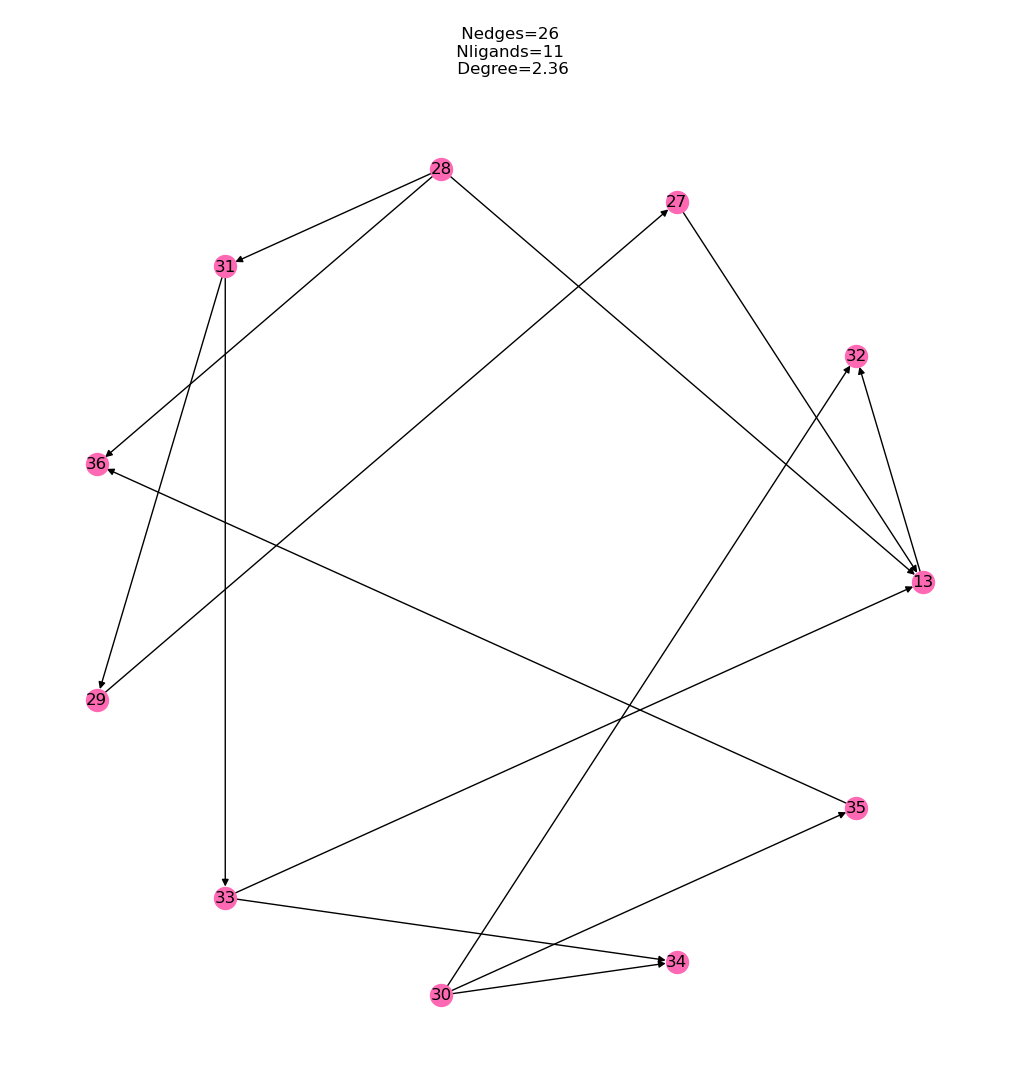

In [5]:
fe = femap.FEMap.from_csv('./final_results_core4_exclude18to23_cycle_FEP_cin.csv')
fe.generate_absolute_values()  # Get MLE generated estimates of the absolute values
fe.draw_graph()

/home/hiroyuki/miniforge3/envs/openfe_env/lib/python3.12/site-packages/cinnabar/femap.py:35: UserWarning: Assuming kcal/mol units on measurements
  warnings.warn("Assuming kcal/mol units on measurements")


<class 'float'>


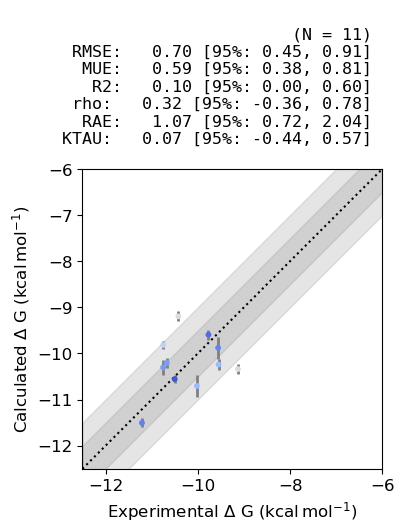

In [6]:
data = femap.read_csv('./final_results_core4_exclude18to23_cycle_FEP_cin.csv')
exp_DG_sum = sum([data['Experimental'][i].DG for i in data['Experimental'].keys()])
shift = exp_DG_sum / len(data['Experimental'].keys())
print(type(shift.m))

cinnabar_plotting.plot_DGs(fe.to_legacy_graph(), figsize=5,  shift=shift.m, filename='./core4_exclude18to23_cycle_FEP.svg', xy_lim=[-12.5,-6])